# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN
13/10/2017

## Aluno: Marcos Felipe de Menezes Mota - 354080

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [19]:
%matplotlib inline

In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import DistanceMetric

In [14]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.distance = "euclidian"
        self.k = 1

    def f_distance(self, a, b):
        dist = DistanceMetric.get_metric(self.distance)
        matDist = dist.pairwise([a,b])
        return matDist[0,-1]

    def closest(self, row):
        """
        Retorna a classe respondente ao ponto mais próximo do dataset de treino.\
        É um exemplo de implementação do kNN com variável
        """
        dists = [self.f_distance(row, item) for item in self.X_train]
        neighbors = sorted(dists)[:self.k]
        nei = [dists.index(x) for x in neighbors]
        votes = self.y_train[nei]
        label = np.argmax(np.bincount(votes))
        return label

    def fit(self, training_data, training_labels, k=1, distance="euclidian"):
        self.X_train = training_data
        self.y_train = training_labels
        self.k = k
        self.distance = distance

    def predict(self, to_classify):
        predictions = []
        for row in to_classify:
            label = self.closest(row)
            predictions.append(label)
        return predictions

In [3]:
d_train = pd.read_csv("train.csv")
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Transformar dados categoricos e limpando algumas colunas**

In [4]:
#Imputação de dados
d_train.Embarked = d_train.Embarked.fillna("None")
d_train.Cabin = d_train.Cabin.fillna("None")
d_train.Age = d_train.Age.fillna(d_train.Age.mean())

#Transformandos categoricos 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
d_train['Sex'] = encoder.fit_transform(d_train.Sex)
d_train['Cabin'] = encoder.fit_transform(d_train.Cabin)
d_train['Embarked'] = encoder.fit_transform(d_train.Embarked)

d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


**Usando pandas para mostrar matrix de correlação e remover as caracteristicas mais correlacionadas**

In [5]:
corr_matrix = d_train.corr().abs()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,0.005007,0.035144,0.042939,0.033207,0.057527,0.001652,0.012658,0.035197,0.009305
Survived,0.005007,1.000000,0.338481,0.543351,0.069809,0.035322,0.081629,0.257307,0.253658,0.174963
Pclass,0.035144,0.338481,1.000000,0.131900,0.331339,0.083081,0.018443,0.549500,0.682176,0.197493
Sex,0.042939,0.543351,0.131900,1.000000,0.084153,0.114631,0.245489,0.182333,0.095991,0.106395
Age,0.033207,0.069809,0.331339,0.084153,1.000000,0.232625,0.179191,0.091566,0.234912,0.034883
SibSp,0.057527,0.035322,0.083081,0.114631,0.232625,1.000000,0.414838,0.159651,0.043525,0.068043
Parch,0.001652,0.081629,0.018443,0.245489,0.179191,0.414838,1.000000,0.216225,0.028179,0.032517
Fare,0.012658,0.257307,0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.502569,0.246359
Cabin,0.035197,0.253658,0.682176,0.095991,0.234912,0.043525,0.028179,0.502569,1.000000,0.232192
Embarked,0.009305,0.174963,0.197493,0.106395,0.034883,0.068043,0.032517,0.246359,0.232192,1.000000


In [6]:
#Deletando colunas desnecessarias e com alta correlação
del d_train['Name']
del d_train['PassengerId']
del d_train["Fare"]
del d_train["Cabin"]
del d_train["Ticket"]

In [7]:
d_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,3
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,3
3,1,1,0,35.0,1,0,3
4,0,3,1,35.0,0,0,3


In [8]:
y = d_train.Survived.values
del d_train["Survived"]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(d_train[:])

In [10]:
from sklearn.model_selection import train_test_split
X_tt, X_valid, y_tt, y_valid = train_test_split(X, y, test_size=0.1, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X_tt, y_tt, test_size=0.25, random_state=0)

In [16]:
list_of_ks = range(1, 120, 4)
knn = KNNClassifier()
scores = []
from sklearn.metrics import accuracy_score, classification_report

for k in list_of_ks:
    knn.fit(X_train, y_train, k=k, distance='euclidean')
    result = knn.predict(X_test)
    score = accuracy_score(y_pred = result, y_true = y_test)
    scores.append(score)

In [17]:
print(scores)

[0.74129353233830841, 0.80099502487562191, 0.82587064676616917, 0.8159203980099502, 0.83582089552238803, 0.85074626865671643, 0.85074626865671643, 0.845771144278607, 0.84079601990049746, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.845771144278607, 0.84079601990049746, 0.8308457711442786, 0.8308457711442786, 0.8308457711442786, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917, 0.82587064676616917]


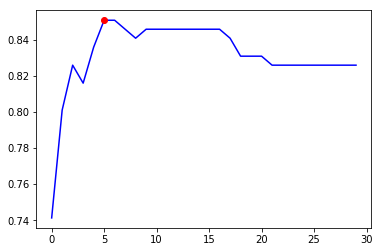

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind_max = scores.index(max(scores))
ax.plot(scores, 'b', ind_max, max(scores), 'ro')
plt.show()

In [36]:
best_k = scores.index(max(scores))*4 + 1
print("Melhor valor de k: ", best_k)

Melhor valor de k:  21


In [38]:
# relatório de classificação para os dados de validação
knn.fit(X_train, y_train, k=best_k, distance='euclidean')
y_pred = knn.predict(X_valid)
print(classification_report(y_pred, y_valid))

             precision    recall  f1-score   support

          0       0.92      0.75      0.83        65
          1       0.57      0.84      0.68        25

avg / total       0.83      0.78      0.79        90

